In [69]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

from scipy.stats import chisquare

# Load sklearn libraries for machine learning
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [71]:
t_train = pd.read_csv("/content/drive/MyDrive/Hackathon Project /Train/Traveldata_train.csv")
s_train = pd.read_csv("/content/drive/MyDrive/Hackathon Project /Train/Surveydata_train.csv")
t_test = pd.read_csv("/content/drive/MyDrive/Hackathon Project /Test/Traveldata_test.csv")
s_test = pd.read_csv("/content/drive/MyDrive/Hackathon Project /Test/Surveydata_test.csv")

In [72]:
t_train.head(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [73]:
s_train.head(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [74]:
l=[t_train, s_train]

In [75]:
for i in l:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID              

The next thing is to determine the null vaklues within the columns

In [76]:
for i in l:
    print(i.nunique())

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64
ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64


We would try to merge the data in the following process and creating a data frame

In [77]:
#Merging Training Data (t+s)
df_train = pd.merge(t_train, s_train, how = 'left', on ='ID')
df_train = df_train.set_index('ID')
df_train.shape

(94379, 24)

The above shows that we have 94,379 rows and 24 columns

In [10]:
#df_train.to_csv("df_train.csv", index = True)

we would be merging the test data as well in the following process

In [78]:
#MERGE Test data (t+s)
df_test = pd.merge(t_test,s_test, how = 'left', on ='ID')
df_test = df_test.set_index('ID')
df_test.shape

(35602, 23)

The above showed that we have 35,602 rows and 23 columns

In [12]:
#df_test.to_csv("df_test.csv", index = True)

In [79]:
df_train.head(5)

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   Customer_Type            85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   Type_Travel              85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94322 non-null  float64
 7   Arrival_Delay_in_Mins    94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_Comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_Location        94349 non-null  object 
 14  Onboard_Wifi

In [81]:
df_train.describe()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
count,94346.000000,94379.000000,94322.000000,94022.000000,94379.000000
mean,39.419647,1978.888185,14.647092,15.005222,0.546658
std,15.116632,1027.961019,38.138781,38.439409,0.497821
min,7.000000,50.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,51.000000,2538.000000,12.000000,13.000000,1.000000
max,85.000000,6951.000000,1592.000000,1584.000000,1.000000


The next stage is to perform the exploratory Data Analysis (EDA)
EDA of df_train

In [82]:
# Column departure and arrival are correlated -> impute missing values on both columns
df_train.Departure_Delay_in_Mins.fillna(df_train.Arrival_Delay_in_Mins, inplace=True)
df_train.Arrival_Delay_in_Mins.fillna(df_train.Departure_Delay_in_Mins, inplace=True)

In [83]:
#Remove Missing Rows, from Columns with Little number of Missing Values
#Delete Rows with Missing Values (containing in columns)
df_train = df_train.dropna( how='any', subset=['Gender', 'Age', 'Departure_Delay_in_Mins',
                                               'Arrival_Delay_in_Mins', 'Seat_Comfort', 'Platform_Location',
                                               'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
                                               'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
                                               'CheckIn_Service', 'Cleanliness', 'Online_Boarding'])

In [84]:
target = ['Overall_Experience']

In [85]:
#Creating a list of numerical columns
num_col = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [86]:
#All columns
all_col = list(df_train.columns)
all_col

['Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Travel_Class',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Overall_Experience',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [87]:
#Creating list of categorical columns
cat_col = [x for x in all_col if x not in num_col]
cat_col = [x for x in cat_col if x not in target]
cat_col

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

Creating a Box Plot to understand the data variation

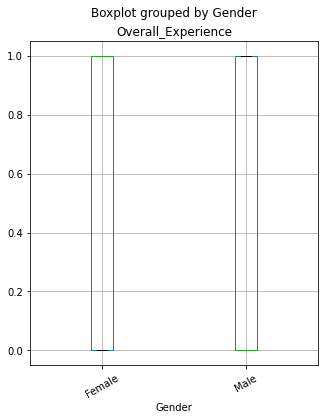

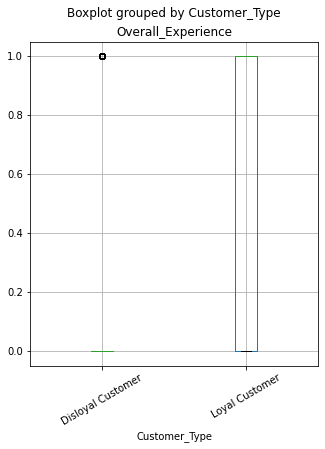

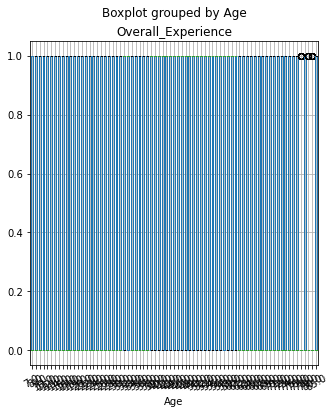

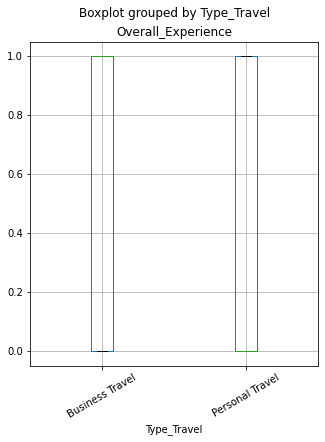

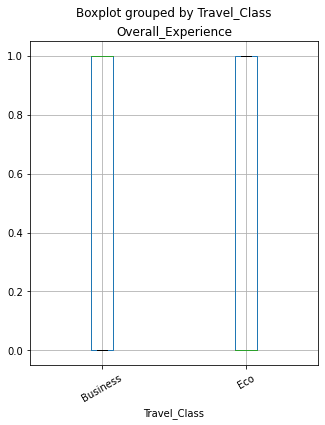

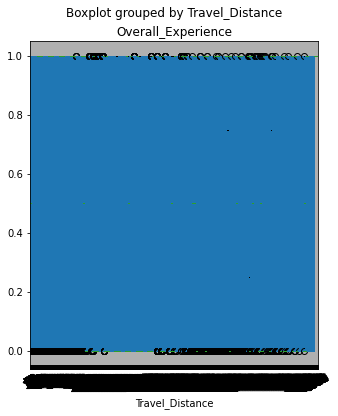

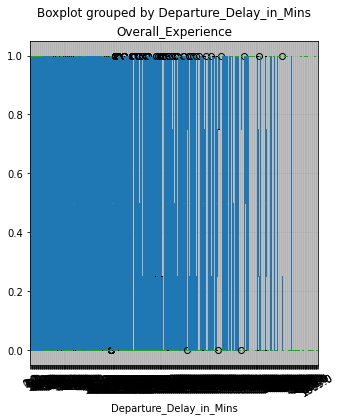

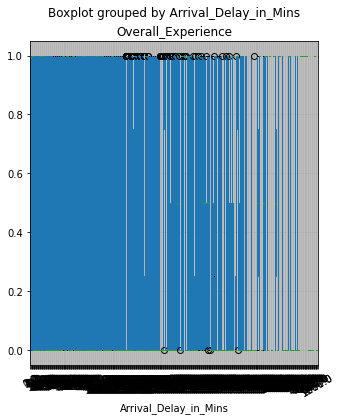

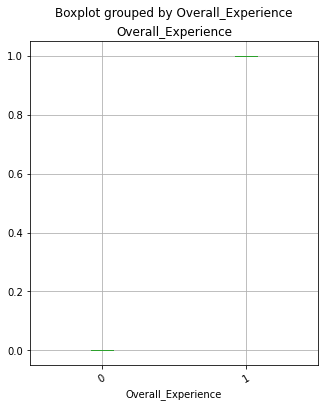

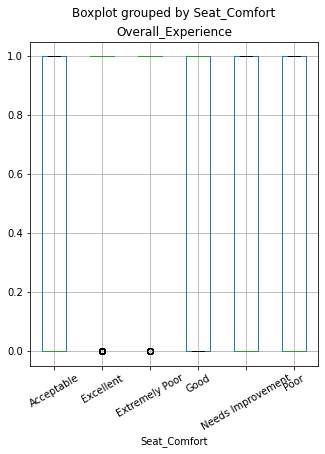

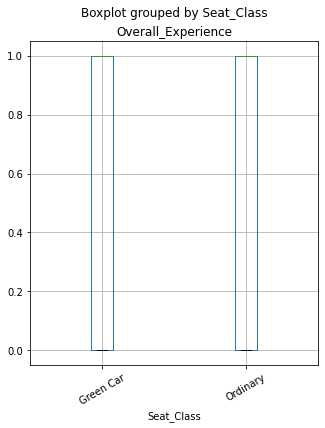

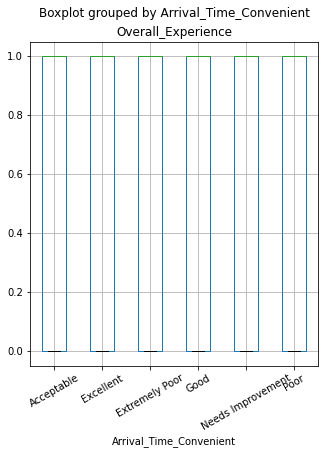

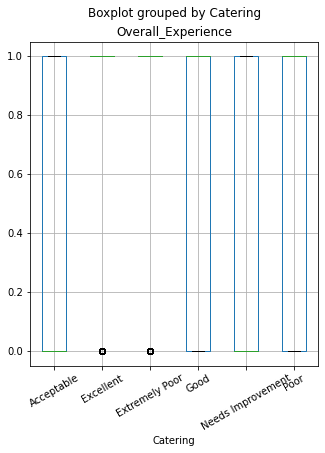

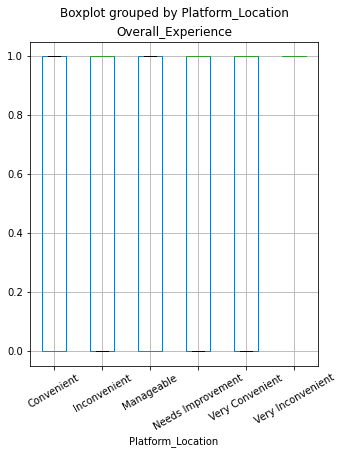

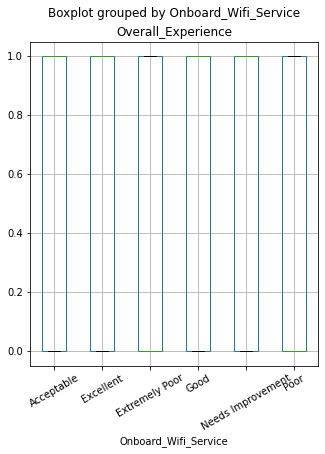

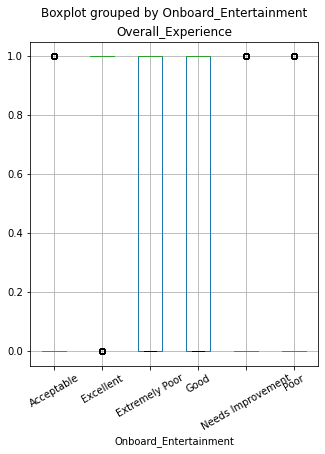

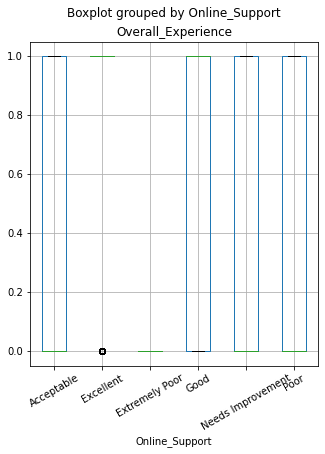

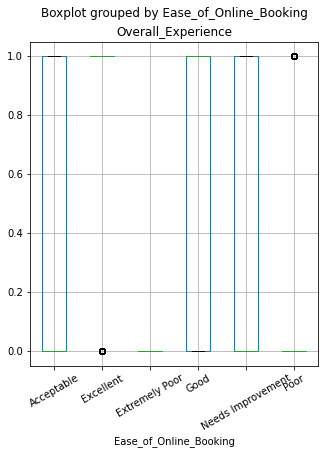

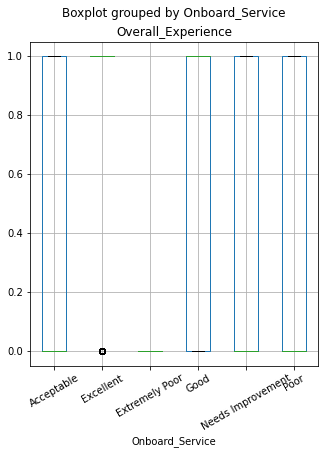

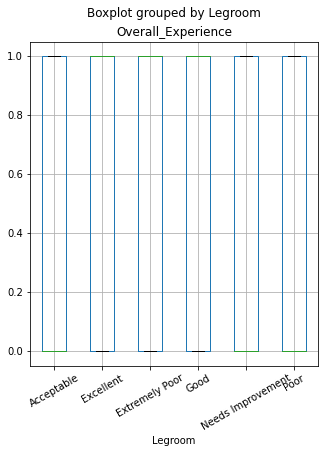

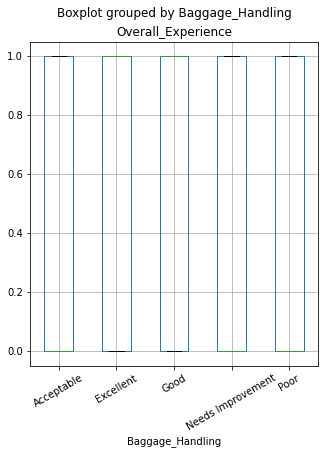

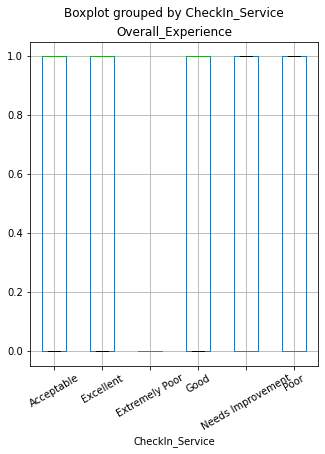

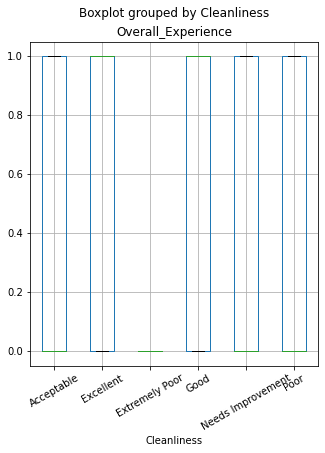

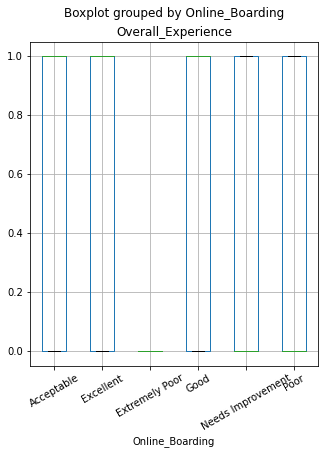

In [88]:
for i in all_col:
    df_train.boxplot('Overall_Experience', i ,rot = 30,figsize=(5,6))

Age
Skew : -0.0


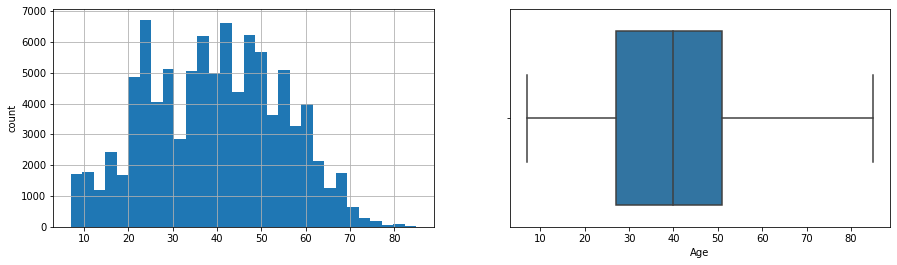

Travel_Distance
Skew : 0.47


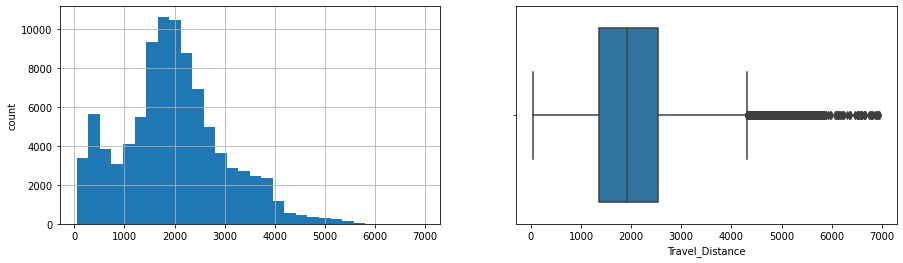

Departure_Delay_in_Mins
Skew : 6.41


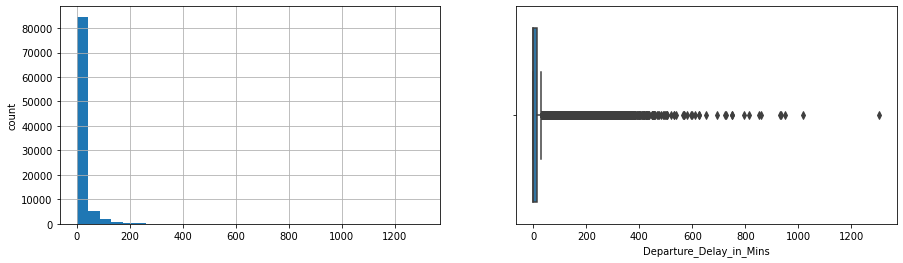

Arrival_Delay_in_Mins
Skew : 6.24


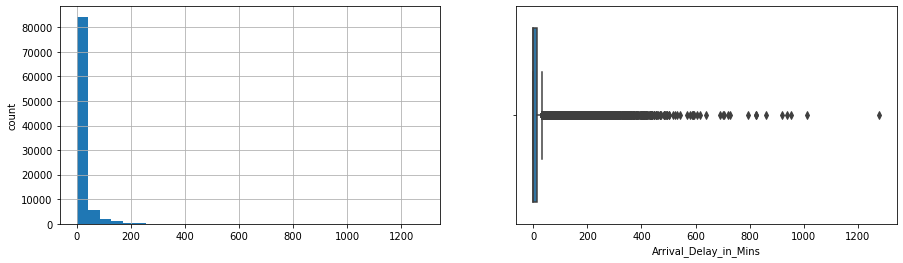

In [89]:

data = df_train

for col in num_col:   #list(df_train.columns):
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data = data)
    plt.show()

From the above, we can see that the Age is multi modal in nature 
The travel distance is rightly skewed
The departure delay in mins has some outliers
The arrival_delay_in_Mins has outliers

Therefore, If overall_experience = 0 - > Loyal CustomerIf Seat_Comforn is Excellent or Extremely Poor -> Overall Experience = 1

Preproceccing the Data

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93995 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   93995 non-null  object 
 1   Customer_Type            85147 non-null  object 
 2   Age                      93995 non-null  float64
 3   Type_Travel              84836 non-null  object 
 4   Travel_Class             93995 non-null  object 
 5   Travel_Distance          93995 non-null  int64  
 6   Departure_Delay_in_Mins  93995 non-null  float64
 7   Arrival_Delay_in_Mins    93995 non-null  float64
 8   Overall_Experience       93995 non-null  int64  
 9   Seat_Comfort             93995 non-null  object 
 10  Seat_Class               93995 non-null  object 
 11  Arrival_Time_Convenient  85175 non-null  object 
 12  Catering                 85300 non-null  object 
 13  Platform_Location        93995 non-null  object 
 14  Onboard_Wifi

The next thing to do is for us to remove the outliers

In [91]:
#Removing Outliers from the data
#Deleting the outliers by delay
print(df_train.shape)

from numpy import mean
from numpy import std

for i in num_col:
    print("i==",i)
    data = df_train[i]
    data_mean, data_std = mean(data), std(data)
    print("Mean, Std:",data_mean, data_std)
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print("Lower, Upper:", lower, upper)
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    df_train.drop(df_train[df_train[i] >= upper].index, inplace = True)
    #outliers_removed = [x for x in data if x >= lower and x <= upper]
    #print('Non-outlier observations: %d' % len(outliers_removed))



#df_train.drop(df_train[df_train['Departure_Delay_in_Mins'] >= 950].index, inplace = True)
#df_train.drop(df_train[df_train['Travel_Distance'] >= 6900].index, inplace = True)
#print(df_train[df_train['Departure_Delay_in_Mins'] >= 970].index)


print(df_train.shape)

(93995, 24)
i== Age
Mean, Std: 39.41930953774137 15.117624442602894
Lower, Upper: -5.933563790067311 84.77218286555005
Identified outliers: 18
i== Travel_Distance
Mean, Std: 1978.7277312533918 1027.9997131741475
Lower, Upper: -1105.2714082690507 5062.726870775834
Identified outliers: 618
i== Departure_Delay_in_Mins
Mean, Std: 14.370633789993466 36.87708561615984
Lower, Upper: -96.26062305848606 125.00189063847299
Identified outliers: 1942
i== Arrival_Delay_in_Mins
Mean, Std: 10.857291313431856 22.00045848923515
Lower, Upper: -55.1440841542736 76.85866678113732
Identified outliers: 2778
(88639, 24)


Combining the train and test together to transform them together

In [92]:
#1. Combine df_train and df_test - to transform together
y = df_train[target]
df_train = df_train.drop(["Overall_Experience"], axis=1)

We can try concatenation method if that would work

In [93]:
ind_train = df_train.index
ind_test = df_test.index

df = pd.concat([df_train,df_test], axis=0)
df.tail()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,Needs Improvement,Green Car,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,Needs Improvement,Ordinary,...,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,Good,Green Car,...,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,Excellent,Ordinary,...,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0,Good,Ordinary,...,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


step two is for us to insert missing values between Departure - Arrival columns, as they are almost correlated

In [94]:
 
df.Departure_Delay_in_Mins.fillna(df.Arrival_Delay_in_Mins, inplace=True)
df.Arrival_Delay_in_Mins.fillna(df.Departure_Delay_in_Mins, inplace=True)

 Encoding Categorical Values

In [95]:
df = df.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], 
           [6, 5, 4, 3, 2, 1])
df = df.replace(['Male', 'Female'], [1,0])
df = df.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
df = df.replace(['Business Travel', 'Personal Travel'], [1,0])
df = df.replace(['Business', 'Eco'], [1,0])
df = df.replace(['Green Car', 'Ordinary'], [1,0])
df = df.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], 
           [6, 5, 4, 3, 2, 1])

In [96]:
df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.0,52.0,NaN,1,272,0.0,5.0,3.0,1,...,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
98800002,1.0,1.0,48.0,0.0,0,2200,9.0,0.0,2.0,0,...,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
98800004,0.0,1.0,44.0,1.0,1,780,13.0,18.0,4.0,0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
98800005,0.0,1.0,50.0,1.0,1,1981,0.0,0.0,4.0,0,...,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
98800006,1.0,1.0,44.0,1.0,1,2810,0.0,0.0,3.0,0,...,5.0,6.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0


In [97]:
# Hot Encoding 0-1 categories
#df = pd.get_dummies(df)
#df.head()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124241 entries, 98800001 to 99935602
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   124211 non-null  float64
 1   Customer_Type            112522 non-null  float64
 2   Age                      124230 non-null  float64
 3   Type_Travel              112110 non-null  float64
 4   Travel_Class             124241 non-null  int64  
 5   Travel_Distance          124241 non-null  int64  
 6   Departure_Delay_in_Mins  124212 non-null  float64
 7   Arrival_Delay_in_Mins    124212 non-null  float64
 8   Seat_Comfort             124219 non-null  float64
 9   Seat_Class               124241 non-null  int64  
 10  Arrival_Time_Convenient  112603 non-null  float64
 11  Catering                 112660 non-null  float64
 12  Platform_Location        124229 non-null  float64
 13  Onboard_Wifi_Service     124229 non-null  float64


In [99]:
#Missing Values in df
df19 = df
missing_columns = [col for col in df19.columns if df19[col].isnull().any()]
missig_values_count = df19.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df19)
missing_Values_df.style.background_gradient(cmap='Pastel1')

,Null Values Count,Share of Missing Values
Gender,30,0.000241
Customer_Type,11719,0.094325
Age,11,0.000089
Type_Travel,12131,0.097641
Departure_Delay_in_Mins,29,0.000233
Arrival_Delay_in_Mins,29,0.000233
Seat_Comfort,22,0.000177
Arrival_Time_Convenient,11638,0.093673
Catering,11581,0.093214
Platform_Location,12,0.000097


In [100]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40) 

0.0    0.507532
1.0    0.492468
Name: Gender, dtype: float64
****************************************
1.0    0.817191
0.0    0.182809
Name: Customer_Type, dtype: float64
****************************************
39.0    0.028520
25.0    0.026805
40.0    0.024833
41.0    0.023915
44.0    0.023907
          ...   
76.0    0.000475
74.0    0.000443
79.0    0.000394
78.0    0.000338
85.0    0.000056
Name: Age, Length: 75, dtype: float64
****************************************
1.0    0.688583
0.0    0.311417
Name: Type_Travel, dtype: float64
****************************************
0    0.522509
1    0.477491
Name: Travel_Class, dtype: float64
****************************************
1963    0.000708
1812    0.000700
1789    0.000668
1639    0.000660
1748    0.000660
          ...   
5034    0.000008
5468    0.000008
4903    0.000008
5356    0.000008
5090    0.000008
Name: Travel_Distance, Length: 5057, dtype: float64
****************************************
0.0      0.586948
1.0      0.029

The fourth step would be for us to impute all other missing values with *mode*.

We can attempt that by applyting the following:

 Step 1: define a simple imputer, which replaces missing values using the median, using SimpleImputer class

Hint: look up the documentation for SimpleImputer
imputer = SimpleImputer(strategy = "most_frequent")

Step 2: impute the missing data
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index) 

Imputing missing values with K Nearest Neighbours.


In [101]:

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)
arr = imputer.transform(df)

In [102]:
df = pd.DataFrame(arr, columns = df.columns, index = df.index)

In [103]:
df

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.000000,52.0,0.333333,1.0,272.0,0.0,5.0,3.0,1.0,...,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
98800002,1.0,1.000000,48.0,0.000000,0.0,2200.0,9.0,0.0,2.0,0.0,...,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
98800004,0.0,1.000000,44.0,1.000000,1.0,780.0,13.0,18.0,4.0,0.0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
98800005,0.0,1.000000,50.0,1.000000,1.0,1981.0,0.0,0.0,4.0,0.0,...,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
98800006,1.0,1.000000,44.0,1.000000,1.0,2810.0,0.0,0.0,3.0,0.0,...,5.0,6.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1.0,1.000000,8.0,0.000000,0.0,1334.0,0.0,0.0,3.0,1.0,...,4.0,3.0,4.0,4.0,5.0,6.0,5.0,4.0,5.0,4.0
99935599,0.0,1.000000,53.0,1.000000,1.0,1772.0,0.0,0.0,3.0,0.0,...,4.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
99935600,1.0,0.000000,22.0,1.000000,0.0,1180.0,0.0,0.0,5.0,1.0,...,3.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,3.0


In [104]:
#Missing Values in df
df19 = df
missing_columns = [col for col in df19.columns if df19[col].isnull().any()]
missig_values_count = df19.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df19)
missing_Values_df.style.background_gradient(cmap='Pastel1')

,Null Values Count,Share of Missing Values


In [105]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40) 

0.000000    0.507441
1.000000    0.492382
0.333333    0.000105
0.666667    0.000072
Name: Gender, dtype: float64
****************************************
1.000000    0.799406
0.000000    0.168978
0.666667    0.020943
0.333333    0.010673
Name: Customer_Type, dtype: float64
****************************************
39.000000    0.028517
25.000000    0.026811
40.000000    0.024831
44.000000    0.023913
41.000000    0.023913
               ...   
39.333333    0.000008
20.333333    0.000008
47.333333    0.000008
51.333333    0.000008
40.666667    0.000008
Name: Age, Length: 81, dtype: float64
****************************************
1.000000    0.662012
0.000000    0.287425
0.666667    0.033837
0.333333    0.016726
Name: Type_Travel, dtype: float64
****************************************
0.0    0.522509
1.0    0.477491
Name: Travel_Class, dtype: float64
****************************************
1963.0    0.000708
1812.0    0.000700
1789.0    0.000668
1639.0    0.000660
1748.0    0.000660
  

In [106]:
df = df.round(decimals = 0)
df = df.astype(int)

In [107]:
df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0,1,52,0,1,272,0,5,3,1,...,5,3,4,3,3,4,3,5,3,2
98800002,1,1,48,0,0,2200,9,0,2,0,...,5,2,5,5,6,3,2,3,5,5
98800004,0,1,44,1,1,780,13,18,4,0,...,4,3,4,4,4,4,4,5,4,4
98800005,0,1,50,1,1,1981,0,0,4,0,...,3,5,6,5,5,5,5,5,5,5
98800006,1,1,44,1,1,2810,0,0,3,0,...,5,6,5,4,4,5,4,4,4,4


It's possible to Keep ONLY NEEDED FEATURES in df.
df = df.drop(['Departure_Delay_in_Mins'], axis=1)
df = df.drop(['Seat_Comfort', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service','Onboard_Entertainment',
              'Online_Support', 'Arrival_Time_Convenient','Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
              'CheckIn_Service', 'Cleanliness', 'Online_Boarding'], axis=1)
df.shape

In [108]:
df = df.drop(['Departure_Delay_in_Mins'], axis=1)

Therefore the Featire Engineering would be to Add extra features.
df["Total_Onboarding"] =  df['Baggage_Handling']+df['CheckIn_Service']+df['Cleanliness'] #''' df['Legroom']+ '''
df["Total_Online"] = df['Online_Support'] +df['Ease_of_Online_Booking']+df['Online_Boarding']
df["Total_On_the_Way"] = df['Onboard_Service']+df['Onboard_Entertainment']+df['Onboard_Wifi_Service']+df['Seat_Comfort']

In [109]:
df

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0,1,52,0,1,272,5,3,1,6,...,5,3,4,3,3,4,3,5,3,2
98800002,1,1,48,0,0,2200,0,2,0,6,...,5,2,5,5,6,3,2,3,5,5
98800004,0,1,44,1,1,780,18,4,0,3,...,4,3,4,4,4,4,4,5,4,4
98800005,0,1,50,1,1,1981,0,4,0,4,...,3,5,6,5,5,5,5,5,5,5
98800006,1,1,44,1,1,2810,0,3,0,3,...,5,6,5,4,4,5,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1,1,8,0,0,1334,0,3,1,6,...,4,3,4,4,5,6,5,4,5,4
99935599,0,1,53,1,1,1772,0,3,0,3,...,4,6,6,5,5,5,5,4,5,5
99935600,1,0,22,1,0,1180,0,5,1,1,...,3,5,2,3,2,4,2,2,6,3


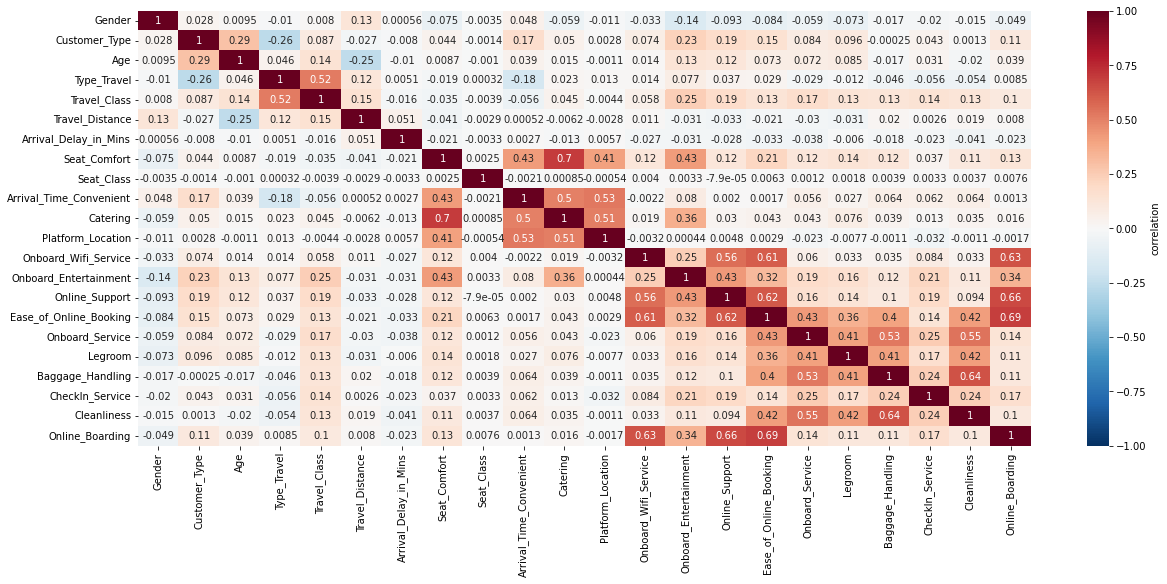

In [110]:
#Correlation for numerical_columns
df_corr = df.corr()

# Plot correlations as a heatmap

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap = 'RdBu_r', 
xticklabels=True, yticklabels=True, annot = True, cbar_kws={'label' : 'correlation'}, ax=ax) 

Divide Back to df_train and df_test

In [111]:
X = df.loc[ind_train]
X_test = df.loc[ind_test]

Building the model

Applying Random Forest with Cross-Validation

In [112]:
y=y.astype('int')

# summarize the dataset
print(X.shape, y.shape)
print(type(X),type(y))

(88639, 22) (88639, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


The next stage would be for us to evaluate the accuracy

In [113]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset

# define the model
rand_forest_classifier_cv = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rand_forest_classifier_cv, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.952 (0.002)


Now that we have an accuracy of 0.952, the next thing is to be able to make predictions usinrandom forest classification and fit the model.

In [114]:

# fit the model on the whole dataset
rand_forest_classifier_cv.fit(X, y)

RandomForestClassifier()

Analyzing, predicting and summarizing 

In [115]:
X_test.shape

(35602, 22)

In [116]:
model = rand_forest_classifier_cv


In [66]:
#df_test = df_test.drop(['Overall_Experience'], axis=1)
#df_test.shape

In [117]:
sub = pd.DataFrame(X_test)

res = model.predict(X_test)

sub["Overall_Experience"] = res #res = model.predict(df_test)
sub_to_file = sub[["Overall_Experience"]]
sub_to_file.to_csv("rf_cl_cv_Day2_feature_eng.csv", index = True)
sub_to_file

,Overall_Experience
ID,
99900001,1
99900002,1
99900003,1
99900004,0
99900005,1
...,...
99935598,0
99935599,1
99935600,1
